#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [1]:
## import cv2
import cv2
## import numpy
import numpy as np
## import matplotlib pyplot
import matplotlib.pyplot as plt
## import KMeans cluster from sklearn
from sklearn.cluster import KMeans
## import distance from scipy.spatial
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('Plaksha_Faculty.jpg')
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1 ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

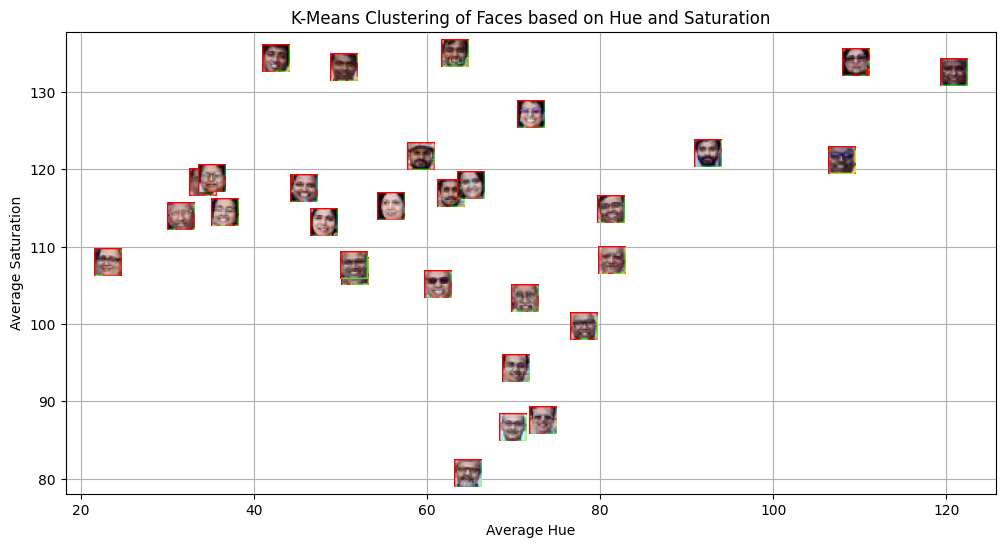

In [3]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, n_init=10).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Average Hue")
## Put y label
plt.ylabel("Average Saturation")
## Put title
plt.title("K-Means Clustering of Faces based on Hue and Saturation")
## Put grid
plt.grid(True)
## show the plot
plt.show()

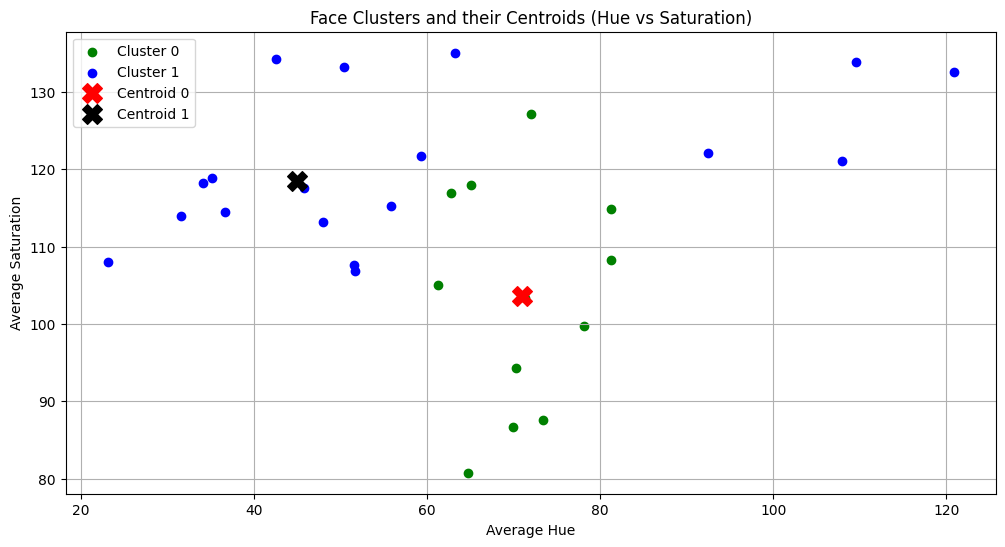

In [4]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='black', marker='X', s=200, label='Centroid 1')

## Put x label
plt.xlabel("Average Hue")
## Put y label
plt.ylabel("Average Saturation")
## Put title
plt.title("Face Clusters and their Centroids (Hue vs Saturation)")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()


In [5]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.1, 5)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Template Face", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

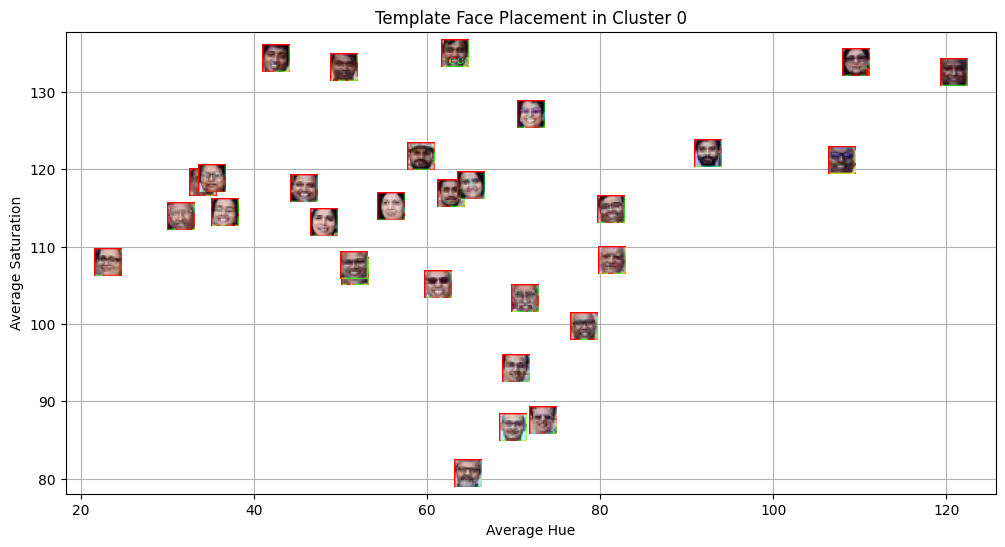

In [6]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
tx, ty, tw, th = template_faces[0]
template_face_roi = template_hsv[ty:ty + th, tx:tx + tw]
template_hue = np.mean(template_face_roi[:, :, 0])
template_saturation = np.mean(template_face_roi[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Average Hue")
## Put y label
plt.ylabel("Average Saturation")
## Put title
plt.title(f"Template Face Placement in Cluster {template_label}")
## Add grid
plt.grid(True)
## show plot
plt.show()

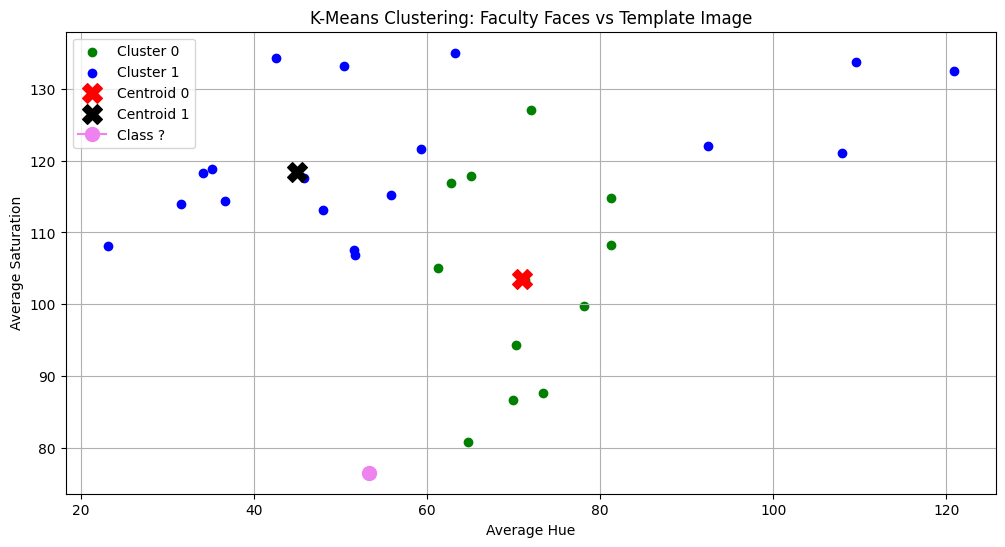

In [7]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=200, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='X', s=200, label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=f'Class ?' )

## Put x label
plt.xlabel("Average Hue")
## Put y label
plt.ylabel("Average Saturation")
## Put title
plt.title("K-Means Clustering: Faculty Faces vs Template Image")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## show the plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

Answer 1: Distance metrics are used to quantify the similarity between data points. The choice of metric often depends on the nature of the data and the specific algorithm (e.g., K-Means or KNN).

Euclidean Distance: The "straight-line" distance between two points in Euclidean space. It is the most common metric for continuous data.

Manhattan Distance (L1 Norm): Calculated as the sum of the absolute differences of their coordinates. It is preferred when data is represented on a grid or involves many discrete features.

Minkowski Distance: A generalized mathematical metric that can represent both Euclidean and Manhattan distances depending on the parameter (p).

Cosine Similarity: Measures the cosine of the angle between two vectors. It focuses on the orientation/direction of the data rather than the magnitude, making it ideal for text and high-dimensional analysis.

Mahalanobis Distance: Measures the distance between a point and a distribution. It is scale-invariant and accounts for correlations between variables.

Answer 2 : Some common real-world applications are- 

Facial and Image Recognition: Similar to your lab exercise, these algorithms are used to identify faces or objects by comparing their visual features (like Hue or Saturation) to a known template or database.

Medical Diagnosis: Doctors use these algorithms to classify tumors as benign or malignant by comparing a patient's symptoms or test results to historically documented cases.

Recommendation Systems: Services like Netflix or Spotify use distance metrics to find users with similar "tastes" (small distance in feature space) to suggest movies or songs you might like.

Credit Scoring and Fraud Detection: Banks classify transactions as "Normal" or "Fraudulent" based on how far a specific transaction deviates from a user's typical spending patterns.

Document and Text Classification: Search engines and email providers use distance-based methods to group similar news articles together or to classify emails as spam based on word frequency and direction (often using Cosine Similarity).

Answer 3: The various distance matrix are -

(a) Euclidean Distance

This is the most common metric, representing the straight-line distance between two points in space. It is calculated as the square root of the sum of squared differences between coordinates.
 
(b) Manhattan Distance (L1 Norm)

Also known as "City Block" or "Taxicab" distance, it calculates the distance as the sum of the absolute differences of their coordinates. It is used when movement is restricted to a grid-like path (no diagonals).

(c) Minkowski Distance

This is a generalized distance metric. By adjusting a parameter p, it can transform into other metrics:
(d) Cosine Similarity

Instead of measuring the physical distance between points, this measures the cosine of the angle between two vectors. It is highly effective for high-dimensional data (like text) where the direction of the data is more important than the magnitude.

(e) Mahalanobis Distance

This metric measures the distance between a point and a distribution. Unlike Euclidean distance, it is scale-invariant and accounts for the correlations between variables, making it ideal for identifying outliers in clusters that are not perfectly spherical.

Answer 4: Key Roles of Cross-Validation are-

Preventing Overfitting: By training and testing the model on different subsets of data, it ensures the model isn't overly tuned to noise in a single training set.

More Accurate Performance Metrics: Instead of relying on a single train-test split, cross-validation (like K-Fold) provides an average score (e.g., Accuracy or F1-Score) across multiple iterations, giving a more stable and reliable estimate of how the model performs.

Hyperparameter Tuning: It is used to find the optimal settings for a model (like the value of K in K-Means or KNN) by checking which configuration performs best across all data folds.

Data Efficiency: It allows you to use your entire dataset for both training and validation, which is particularly helpful when you have a limited amount of data.

1. Bias in KNN

Bias refers to the error introduced by approximating a real-life problem with a simplified model.

High Bias: Occurs when the value of K is large. When K is high, the model becomes too simple because it averages out the local patterns to make a prediction. This can lead to underfitting, where the model misses important trends in the data.

Low Bias: Occurs when the value of K is small (e.g., K=1). The model captures the fine-grained details of the training data very closely.

2. Variance in KNN

Variance refers to the model's sensitivity to small fluctuations in the training set.

High Variance: Occurs when K is small. At K=1, the model is extremely sensitive to noise or outliers in the data. If you change even one data point, the decision boundary might shift drastically. This leads to overfitting.

Low Variance: Occurs when K is large. Because the model looks at many neighbors, it is more stable and less likely to change its mind because of a single noisy data point.